In [1]:
# import libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load dataset objek wisata
attraction_df = pd.read_csv('../dataset/objek_data.csv', sep = ',', encoding='ISO-8859-1')

In [3]:
# load dataset rating
ratings_df = pd.read_csv('../dataset/rating_data.csv', sep = ',', encoding='ISO-8859-1')

In [4]:
# rename kolom dalam dataframe rating
ratings_df.columns = ['id_user','nama', 'username', 'rating', 'tanggal', 'nama_objek','id_objek']

In [5]:
# rename kolom pada dataframe attration
attraction_df.columns = ['id_objek','nama_objek', 'type']

In [6]:
# duplikasi index sebagai kolom baru
attraction_df['List Index'] = attraction_df.index
attraction_df.head()

,id_objek,nama_objek,type,List Index
0,999,AEON Mall BSD City,TEMPAT BELANJA,0
1,998,Agrowisata Teba Sari Bali,WISATA ALAM & TAMAN,1
2,997,Air Panas Banjar,WISATA ALAM & TAMAN,2
3,996,Air Terjun Aling-Aling,WISATA ALAM & TAMAN,3
4,995,Air Terjun Benang Stokal and Benang Kelambu,WISATA ALAM & TAMAN,4


In [7]:
# membuat dataframe baru berdasarkan type objek wisata
attraction_type = attraction_df['type'].unique()                        # membuat series dengan unique values dari kolom type
attraction_type = pd.DataFrame(attraction_type).reset_index()           # membuat dataframe dari series dan membuat kolom baru berisi index number sebagai ID
attraction_type.columns = ['List Index','type']                         # rename kolom dataframe
attraction_type

,List Index,type
0,0,TEMPAT BELANJA
1,1,WISATA ALAM & TAMAN
2,2,TRANSPORTASI
3,3,PEMANDANGAN & TENGARA
4,4,SUMBER INFORMASI WISATAWAN
5,5,TAMAN AIR & TAMAN HIBURAN
6,6,MUSEUM
7,7,LAINNYA
8,8,KONSER & PERTUNJUKAN


In [8]:
# Merge data rating dengan objek wisata dengan foreign key nama objek
merge_data = attraction_df.merge(ratings_df, on='nama_objek')

In [9]:
# membuat dataframe baru dengan grouping 
# untuk mendapatkan nilai agregasi rating maksimum
# tiap tipe objek
merge_data_type = merge_data.groupby(['type','id_user','nama','username'])['rating'].max().reset_index().copy()
merge_data_type = merge_data_type.merge(attraction_type, on='type')
merge_data_type['rating'].unique()

array([5, 2, 4, 3, 1])

In [10]:
# jumlah data rating per objek dan per tipe objek
print(len(merge_data))
print(len(merge_data_type))

110
69


In [11]:
# menampilkan 5 data teratas objek
merge_data.head()

,id_objek_x,nama_objek,type,List Index,id_user,nama,username,rating,tanggal,id_objek_y
0,999,AEON Mall BSD City,TEMPAT BELANJA,0,1,Eko,/Profile/Eko1,1,19-Sep,999
1,999,AEON Mall BSD City,TEMPAT BELANJA,0,1,Eko,/Profile/Eko2,1,Okt 2019,999
2,999,AEON Mall BSD City,TEMPAT BELANJA,0,1,Eko,/Profile/Eko3,1,Agt 2019,999
3,998,Agrowisata Teba Sari Bali,WISATA ALAM & TAMAN,1,1,Eko,/Profile/Eko4,1,Okt 2019,998
4,998,Agrowisata Teba Sari Bali,WISATA ALAM & TAMAN,1,2,Juliana,/Profile/Jultur,1,19-Jul,998


In [12]:
# menampilkan 5 data teratas tipe objek
merge_data_type.head()

,type,id_user,nama,username,rating,List Index
0,LAINNYA,35,Ruth,/Profile/Ruth,5,7
1,LAINNYA,58,Sandy,/Profile/Sandy,2,7
2,LAINNYA,82,Crystal,/Profile/Crystal,4,7
3,MUSEUM,25,Dedi,/Profile/dedi,5,6
4,MUSEUM,50,Sanny,/Profile/Sanny,3,6


In [13]:
# grouping data rating objek wisata berdasarkan username
GroupUser = merge_data.groupby('username')
print(GroupUser)

In [14]:
# grouping data rating tipe objek wisata berdasarkan username
GroupUser_type = merge_data_type.groupby('username')
print(GroupUser_type)

In [15]:
print(len(GroupUser))
print(len(GroupUser_type))

37
37


In [16]:
GroupUser.head()

,id_objek_x,nama_objek,type,List Index,id_user,nama,username,rating,tanggal,id_objek_y
0,999,AEON Mall BSD City,TEMPAT BELANJA,0,1,Eko,/Profile/Eko1,1,19-Sep,999
1,999,AEON Mall BSD City,TEMPAT BELANJA,0,1,Eko,/Profile/Eko2,1,Okt 2019,999
2,999,AEON Mall BSD City,TEMPAT BELANJA,0,1,Eko,/Profile/Eko3,1,Agt 2019,999
3,998,Agrowisata Teba Sari Bali,WISATA ALAM & TAMAN,1,1,Eko,/Profile/Eko4,1,Okt 2019,998
4,998,Agrowisata Teba Sari Bali,WISATA ALAM & TAMAN,1,2,Juliana,/Profile/Jultur,1,19-Jul,998
...,...,...,...,...,...,...,...,...,...,...
105,695,Pemandian Air Panas Guci,WISATA ALAM & TAMAN,66,89,Syafa,/Profile/Syafa,4,18-Jan,695
106,694,Perpustakaan Soeman H.S.,SUMBER INFORMASI WISATAWAN,67,89,Syafa,/Profile/Syafa,4,17-Jan,694
107,693,Pertapaan Karmel OCD,PEMANDANGAN & TENGARA,68,91,Hendra,/Profile/Hendra,4,17-Jul,693
108,672,Punthuk Setumbu,PEMANDANGAN & TENGARA,70,91,Hendra,/Profile/Hendra,4,18-Nov,672


In [17]:
GroupUser_type.head()

,type,id_user,nama,username,rating,List Index
0,LAINNYA,35,Ruth,/Profile/Ruth,5,7
1,LAINNYA,58,Sandy,/Profile/Sandy,2,7
2,LAINNYA,82,Crystal,/Profile/Crystal,4,7
3,MUSEUM,25,Dedi,/Profile/dedi,5,6
4,MUSEUM,50,Sanny,/Profile/Sanny,3,6
...,...,...,...,...,...,...
64,WISATA ALAM & TAMAN,63,Cinthya,/Profile/Cinthya,2,1
65,WISATA ALAM & TAMAN,68,Jacky,/Profile/Jacky,4,1
66,WISATA ALAM & TAMAN,82,Crystal,/Profile/Crystal,4,1
67,WISATA ALAM & TAMAN,86,Syafa,/Profile/Syafa,4,1


In [18]:
Users = len(GroupUser)                                                      # jumlah users untuk training data rating objek
list_idx = []                                                               # membuat list user
for id_user, UserCurrent in GroupUser:                                      # iterasi untuk tiap user di GroupUser
    temporary = [0]*len(attraction_df)                                      # variabel sementara untuk menyimpan tiap rating
    for num, attraction in UserCurrent.iterrows():                          # iterasi untuk tiap objek di UserCurrent
        temporary[attraction['List Index']] = attraction['rating']/5.0      # membagi 5 rating dan menyimpannya sementara
    list_idx.append(temporary)                                              # menambahkan rating tiap user pada data training (user)
    if Users == 0:                                                          # mengecek apakah semua data rating tiap user sudah masukkan
        break
    Users -= 1

In [19]:
Users = len(GroupUser_type)                                                 # jumlah users untuk training data rating tipe objek
list_idx_type = []                                                          # membuat list user
for id_user, UserCurrent in GroupUser_type:                                 # iterasi untuk tiap user di GroupUser_type
    temporary = [0]*len(attraction_type)                                    # variabel sementara untuk menyimpan tiap rating
    for num, attraction in UserCurrent.iterrows():                          # iterasi untuk tiap objek di UserCurrent
        temporary[attraction['List Index']] = attraction['rating']/5.0      # membagi 5 rating dan menyimpannya sementara
    list_idx_type.append(temporary)                                         # menambahkan rating tiap user pada data training (user)
    if Users == 0:                                                          # mengecek apakah semua data rating tiap user sudah masukkan
        break
    Users -= 1

In [20]:
# menampilkan sparse matrix data rating objek
print(list_idx)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6, 0.6, 0.6, 0.6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 0.6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0.6, 0.6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.8, 0.8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0.4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [21]:
# menampilkan sparse matrix data rating tipe objek
print(list_idx_type)

[[0, 0.6, 0.6, 1.0, 0, 0.6, 0, 0, 0], [0, 0.6, 0.6, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0.8, 0, 0, 0], [0, 0.4, 0, 0, 0, 0, 0, 0, 0], [0, 0.4, 0, 0, 0, 0, 0, 0, 0], [0, 0.4, 0.4, 0.4, 0, 0, 0, 0, 0], [0, 0.8, 0, 0, 0, 0, 0, 0.8, 0], [0, 0.8, 0, 0.8, 0, 0, 0, 0, 0], [0, 0.6, 0, 0.6, 0, 0, 0, 0, 0], [0.2, 0, 0, 0, 0, 0, 0, 0, 0], [0.2, 0, 0, 0, 0, 0, 0, 0, 0], [0.2, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0.2, 0, 0, 0, 0, 0, 0, 0], [0, 0.4, 0, 0, 0, 0, 0, 0, 0], [0, 0.8, 0, 0, 0, 0, 0, 0, 0], [0.6, 0, 0.6, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0.8, 0, 0, 0, 0, 0], [0.6, 0.8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0.8, 0, 0, 0, 0, 0], [0, 0.6, 0, 0, 0.6, 0, 0, 0, 0], [0, 0.8, 0, 0.4, 0, 0, 0, 0, 0], [0, 0.2, 0, 0, 0, 0, 0, 0, 0], [0, 0.2, 0, 0, 0, 0, 0, 0, 0], [1.0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 0], [0, 0, 0, 0.4, 0, 0.4, 0, 0.4, 0], [0.6, 0.6, 0, 0.6, 0, 0.6, 0.6, 0, 0], [0, 0.6, 0, 0, 0, 0, 0, 0, 0], [0.8, 0.8, 0, 0, 0.8, 0, 0.8, 0, 0], [0, 0, 0, 0.8, 0, 0, 0, 0, 0], [0, 0, 0, 0.6, 0, 0, 0, 0, 0], [1.0, 1.0, 1.0, 1.0

In [22]:
# import tensorflow
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [23]:
# Membuat RBM dengan TF
unit_hidden = 20                                                            # menentukan hidden layer baik untuk model rating objek dan rating tipe objek
unit_visible = len(attraction_df)                                           # menentukan visible layer untuk model rating objek
unit_visible_type = len(attraction_type)                                    # menentukan visible layer untuk model rating tipe objek
#No. of unique attraction
v_b = tf.placeholder("float", [unit_visible])                               # visible bias, jumlah Objek unik
v_b_type = tf.placeholder("float", [unit_visible_type])                     # visible bias, jumlah Tipe Objek unik
#no. of features 
h_b = tf.placeholder("float", [unit_hidden])                                # hidden bias untuk rating objek, jumlah nodes sesuai dengan konfigurasi
h_b_type = tf.placeholder("float", [unit_hidden])                           # hidden bias rating tipe objek, jumlah nodes sesuai dengan konfigurasi
Weight = tf.placeholder("float", [unit_visible, unit_hidden])                   
Weight_type = tf.placeholder("float", [unit_visible_type, unit_hidden])

In [24]:
print(v_b)
print(v_b_type)

Tensor("Placeholder:0", shape=(99,), dtype=float32)
Tensor("Placeholder_1:0", shape=(9,), dtype=float32)


In [25]:
# create visible and hidden layer units and set their activation function use sigmoid and relu functions

In [26]:
# Input Preprocessing
v_0 = tf.placeholder("float", [None, unit_visible])                                 # konversi visible layer rating objek menjadi tf placeholder yang akan digunakan sebagai input
v_0_type = tf.placeholder("float", [None, unit_visible_type])                       # konversi visible layer rating type objek menjadi tf placeholder yang akan digunakan sebagai input
_h0 = tf.nn.sigmoid(tf.matmul(v_0, Weight) + h_b)                                   # sigmoid activation untuk hidden layer rating objek
_h0_type = tf.nn.sigmoid(tf.matmul(v_0_type, Weight_type) + h_b_type)               # sigmoid activation untuk hidden layer rating type objek
h_0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0))))                   # relu activation untuk hidden layer rating objek
h_0_type = tf.nn.relu(tf.sign(_h0_type - tf.random_uniform(tf.shape(_h0_type))))    # relu activation untuk hidden layer rating type objek

#Reconstruction
_v1 = tf.nn.sigmoid(tf.matmul(h_0, tf.transpose(Weight)) + v_b)                     # rekonstruksi visible layer rating objek, sigmoid activation
_v1_type = tf.nn.sigmoid(tf.matmul(h_0_type, tf.transpose(Weight_type)) + v_b_type) # rekonstruksi visible layer rating type objek, sigmoid activation
v1 = tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1))))                    # rekonstruksi visible layer rating objek, relu activation
v1_type = tf.nn.relu(tf.sign(_v1_type - tf.random_uniform(tf.shape(_v1_type))))     # rekonstruksi visible layer rating type objek, relu activation
h_1 = tf.nn.sigmoid(tf.matmul(v1, Weight) + h_b)                                    # rekonstruksi hidden layer rating objek, sigmoid activation
h_1_type = tf.nn.sigmoid(tf.matmul(v1_type, Weight_type) + h_b_type)                # rekonstruksi hidden layer rating type objek, sigmoid activation

In [27]:
print(Weight)
print(Weight_type)

Tensor("Placeholder_4:0", shape=(99, 20), dtype=float32)
Tensor("Placeholder_5:0", shape=(9, 20), dtype=float32)


In [28]:
# set rbm training parameters

In [29]:
# learnind rate
Alpa = 0.1
# mengeset gradients
P_W_Gradients = tf.matmul(tf.transpose(v_0), h_0)
N_W_Gradients = tf.matmul(tf.transpose(v1), h_1)

P_W_Gradients_type = tf.matmul(tf.transpose(v_0_type), h_0_type)
N_W_Gradients_type = tf.matmul(tf.transpose(v1_type), h_1_type)

# kalkulasi constrastive divergence
contrastive_divergence = (P_W_Gradients - N_W_Gradients) / tf.to_float(tf.shape(v_0)[0])
contrastive_divergence_type = (P_W_Gradients_type - N_W_Gradients_type) / tf.to_float(tf.shape(v_0_type)[0])

# membuat metode untuk update weight dan layer/bias
update_weight = Weight+ Alpa*contrastive_divergence
update_weight_type = Weight_type+ Alpa*contrastive_divergence_type
update_visibleBias = v_b + Alpa*tf.reduce_mean(v_0 - v1, 0)
update_visibleBias_type = v_b_type + Alpa*tf.reduce_mean(v_0_type - v1_type, 0)
update_hiddenBias = h_b + Alpa*tf.reduce_mean(h_0 - h_1, 0)
update_hiddenBias_type = h_b_type + Alpa*tf.reduce_mean(h_0_type - h_1_type, 0)

Instructions for updating:
Use `tf.cast` instead.


In [30]:
#set error function - RMSE
error = v_0 - v1
error_type = v_0_type - v1_type
sum_error = tf.sqrt(tf.reduce_mean(error * error))
sum_error_type = tf.sqrt(tf.reduce_mean(error_type * error_type))

In [31]:
# fungsi free energy 
def free_energy(v_sample, W, vb, hb):
    wx_b = np.dot(v_sample, W) + hb
    vbias_term = np.dot(v_sample, vb)
    hidden_term = np.sum(np.log(1 + np.exp(wx_b)), axis = 1)
    return hidden_term - vbias_term

In [32]:
# konfigurasi variabel awal
#Current weight
curren_weight = np.zeros([unit_visible, unit_hidden], np.float32)
curren_weight_type = np.zeros([unit_visible_type, unit_hidden], np.float32)
#Current visible unit biases
current_visibleBias = np.zeros([unit_visible], np.float32)
current_visibleBias_type = np.zeros([unit_visible_type], np.float32)
#Current hidden unit biases
cur_hiddenBias = np.zeros([unit_hidden], np.float32)
#Previous weight
previous_weight = np.zeros([unit_visible, unit_hidden], np.float32)
previous_weight_type = np.zeros([unit_visible_type, unit_hidden], np.float32)
#Previous visible unit biases
previous_visibleBias = np.zeros([unit_visible], np.float32)
previous_visibleBias_type = np.zeros([unit_visible_type], np.float32)
#Previous hidden unit biases
previous_hiddenBias = np.zeros([unit_hidden], np.float32)
previous_hiddenBias_type = np.zeros([unit_hidden], np.float32)
session = tf.Session()
session.run(tf.global_variables_initializer())
session_type = tf.Session()
session_type.run(tf.global_variables_initializer())

In [33]:
v_0

<tf.Tensor 'Placeholder_6:0' shape=(?, 99) dtype=float32>

In [34]:
v_0_type

<tf.Tensor 'Placeholder_7:0' shape=(?, 9) dtype=float32>

In [35]:
#Train RBM with 20 epochs 

In [36]:
# setting data latih dan  validasi
train = list_idx[:int(round(len(list_idx)/2,0))]
valid = list_idx[-int(round(len(list_idx)/2,0)):]

In [37]:
epochs = 500
batchsize = 10
errors = []
energy_train = []
energy_valid = []
# iterasi sesuai dengan epoch
for i in range(epochs):
    for start, end in zip( range(0, len(train), batchsize), range(batchsize, len(train), batchsize)):  
        # training batch
        batch = train[start:end]
        # update training variable berdasarkan input parameter sebelumnya
        curren_weight = session.run(update_weight, feed_dict={v_0: batch, Weight: previous_weight, v_b: previous_visibleBias, h_b: previous_hiddenBias})
        current_visibleBias = session.run(update_visibleBias, feed_dict={v_0: batch, Weight: previous_weight, v_b: previous_visibleBias, h_b: previous_hiddenBias})
        cur_nb = session.run(update_hiddenBias, feed_dict={v_0: batch, Weight: previous_weight, v_b: previous_visibleBias, h_b: previous_hiddenBias})
        previous_weight = curren_weight
        previous_visibleBias = current_visibleBias
        previous_hiddenBias = cur_nb
    # mencatat error dan validasi
    errors.append(session.run(sum_error, feed_dict={v_0: train, Weight: curren_weight, v_b: current_visibleBias, h_b: cur_nb}))
    energy_train.append(np.mean(free_energy(train, curren_weight, current_visibleBias, cur_nb)))
    energy_valid.append(np.mean(free_energy(valid, curren_weight, current_visibleBias, cur_nb)))
    print (errors[-1])

0.6602554
0.63724643
0.59958833
0.5802782
0.5557777
0.5619031
0.54866433
0.5359364
0.52589506
0.48976046
0.47451317
0.4620503
0.45937058
0.43644312
0.44079307
0.41142493
0.4107424
0.42510974
0.40134454
0.38141444
0.34899247
0.391578
0.35520816
0.34931388
0.3231092
0.33015317
0.33837932
0.28958735
0.31856158
0.2833185
0.32535917
0.28686157
0.30487987
0.2554018
0.29381964
0.2690967
0.27261877
0.28212756
0.26361895
0.2705525
0.2547418
0.26019073
0.25780737
0.23693706
0.26510486
0.25029725
0.26404434
0.24917372
0.2367001
0.219478
0.23574987
0.2277593
0.22328031
0.22923285
0.2455439
0.24827124
0.2406967
0.23741028
0.213779
0.22126053
0.19597521
0.20873195
0.22151402
0.19654708
0.22478323
0.20656997
0.21246246
0.19825275
0.20900062
0.21404132
0.18416555
0.2111377
0.20980458
0.2021767
0.20657
0.2010634
0.18927471
0.2030077
0.19796948
0.20738335
0.2021767
0.2010634
0.17984904
0.17796707
0.1868878
0.19045694
0.18897799
0.19221668
0.21166858
0.19540168
0.18538038
0.18447
0.17574596
0.18748738
0.

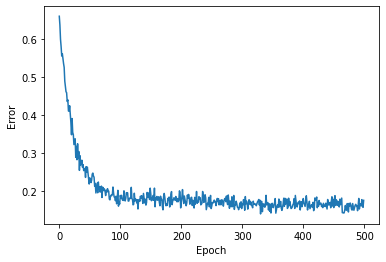

In [38]:
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

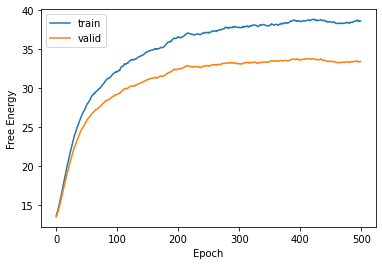

In [39]:
fig, ax = plt.subplots()
ax.plot(energy_train, label='train')
ax.plot(energy_valid, label='valid')
leg = ax.legend()
plt.xlabel("Epoch")
plt.ylabel("Free Energy")
plt.show()

In [40]:
def rmse(er):
    return np.sqrt((np.array(er) ** 2).mean())

In [41]:
rmse(errors)

0.20758782

In [42]:
train_type = list_idx_type[:int(round(len(list_idx)/2,0))]
valid_type = list_idx_type[-int(round(len(list_idx)/2,0)):]


In [43]:
epochs = 500
batchsize = 10
errors_type = []
energy_train_type = []
energy_valid_type = []
# iterasi sesuai dengan epoch
for i in range(epochs):
    for start, end in zip( range(0, len(train_type), batchsize), range(batchsize, len(train_type), batchsize)):
        # training batch
        batch = train_type[start:end]
        # update training variable berdasarkan input parameter sebelumnya
        curren_weight_type = session_type.run(update_weight_type, feed_dict={v_0_type: batch, Weight_type: previous_weight_type, v_b_type: previous_visibleBias_type, h_b_type: previous_hiddenBias_type})
        current_visibleBias_type = session_type.run(update_visibleBias_type, feed_dict={v_0_type: batch, Weight_type: previous_weight_type, v_b_type: previous_visibleBias_type, h_b_type: previous_hiddenBias_type})
        cur_nb_type = session_type.run(update_hiddenBias_type, feed_dict={v_0_type: batch, Weight_type: previous_weight_type, v_b_type: previous_visibleBias_type, h_b_type: previous_hiddenBias_type})
        previous_weight_type = curren_weight_type
        previous_visibleBias_type = current_visibleBias_type
        previous_hiddenBias_type = cur_nb_type
    # mencatat error dan validasi
    errors_type.append(session_type.run(sum_error_type, feed_dict={v_0_type: list_idx_type, Weight_type: curren_weight_type, v_b_type: current_visibleBias_type, h_b_type: cur_nb_type}))
    energy_train_type.append(np.mean(free_energy(train_type, curren_weight_type, current_visibleBias_type, cur_nb_type)))
    energy_valid_type.append(np.mean(free_energy(valid_type, curren_weight_type, current_visibleBias_type, cur_nb_type)))
    print (errors_type[-1])

0.649139
0.60409015
0.59457004
0.591024
0.5838672
0.5444782
0.51148957
0.5219506
0.515583
0.48682338
0.5055844
0.49598992
0.47051182
0.49295333
0.5014094
0.45361412
0.4781094
0.45625454
0.45228812
0.43329868
0.49295336
0.4184915
0.41052225
0.42981943
0.4582248
0.44357273
0.45228812
0.43675023
0.4787371
0.4256068
0.41271096
0.4046279
0.4097901
0.43880808
0.4177733
0.4068483
0.40758574
0.39638
0.421352
0.43191034
0.4408564
0.4061095
0.42206413
0.41920847
0.40758574
0.41488808
0.4442492
0.42981943
0.4298194
0.4031408
0.45691222
0.41561127
0.42348477
0.4119827
0.42348474
0.4673097
0.4177733
0.4360621
0.4241933
0.40536937
0.37376422
0.40832186
0.39939895
0.39638
0.42348477
0.40758574
0.41343796
0.38950187
0.4097901
0.37376422
0.42490062
0.39939895
0.44559908
0.41271096
0.4270156
0.43191034
0.35649276
0.4119827
0.36809713
0.40905663
0.40536937
0.41125312
0.3840671
0.41052228
0.39027208
0.42981943
0.3801375
0.4184915
0.4008999
0.3514022
0.4206387
0.3697252
0.40610948
0.38250008
0.3910408
0.40

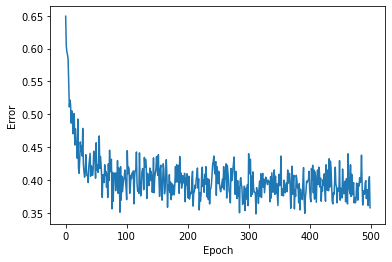

In [44]:
plt.plot(errors_type)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

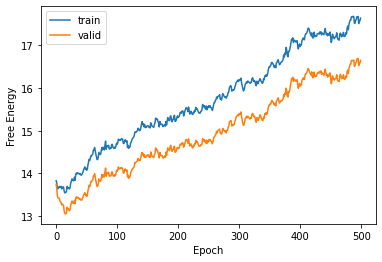

In [45]:
fig, ax = plt.subplots()
ax.plot(energy_train_type, label='train')
ax.plot(energy_valid_type, label='valid')
leg = ax.legend()
plt.xlabel("Epoch")
plt.ylabel("Free Energy")
plt.show()

In [46]:
rmse(errors_type)

0.40420017

In [47]:
# Input untuk testing
userInput = [list_idx[1]]
userInput_type = [list_idx_type[1]]

In [48]:
# memasukkan user dan merekonstruksi input untuk model rating objek
h_h0 = tf.nn.sigmoid(tf.matmul(v_0, Weight) + h_b)
v_v1 = tf.nn.sigmoid(tf.matmul(h_h0, tf.transpose(Weight)) + v_b)
feedding = session.run(h_h0, feed_dict={ v_0: userInput, Weight: previous_weight, h_b: previous_hiddenBias})
reconstruction = session.run(v_v1, feed_dict={ h_h0: feedding, Weight: previous_weight, v_b: previous_visibleBias})

In [49]:
# memasukkan user dan merekonstruksi input untuk model rating type objek
h_h0_type = tf.nn.sigmoid(tf.matmul(v_0_type, Weight_type) + h_b_type)
v_v1_type = tf.nn.sigmoid(tf.matmul(h_h0_type, tf.transpose(Weight_type)) + v_b_type)
feedding_type = session_type.run(h_h0_type, feed_dict={ v_0_type: userInput_type, Weight_type: previous_weight_type, h_b_type: previous_hiddenBias_type})
reconstruction_type = session_type.run(v_v1_type, feed_dict={ h_h0_type: feedding_type, Weight_type: previous_weight_type, v_b_type: previous_visibleBias_type})

In [50]:
# merge data awal rating objek dengan hasil rekomendasi
attractions_scored_user = attraction_df
attractions_scored_user["Recommendation Score"] = reconstruction[0]
attractions_scored_user.sort_values(["Recommendation Score"], ascending=False).head(20)

,id_objek,nama_objek,type,List Index,Recommendation Score
61,748,Pantai Kedonganan,WISATA ALAM & TAMAN,61,0.114948
19,974,Bali Sea Turtle Society (BSTS),WISATA ALAM & TAMAN,19,0.113287
21,946,Circus Waterpark Bali,TAMAN AIR & TAMAN HIBURAN,21,0.112066
20,947,Ciputra Waterpark,TAMAN AIR & TAMAN HIBURAN,20,0.095076
59,750,Pantai Jimbaran,LAINNYA,59,0.087712
60,749,Pantai Karma Bali,WISATA ALAM & TAMAN,60,0.087612
62,747,Pantai Kelingking,WISATA ALAM & TAMAN,62,0.086236
2,997,Air Panas Banjar,WISATA ALAM & TAMAN,2,0.070590
18,975,Bali Pulina - Pariwisata Pertanian,PEMANDANGAN & TENGARA,18,0.065312
8,991,Air Terjun Madakaripura,WISATA ALAM & TAMAN,8,0.057921


In [51]:
# merge data awal rating type objek dengan hasil rekomendasi
attractions_scored_user_type = attraction_type
attractions_scored_user_type["Recommendation Score"] = reconstruction_type[0]
attractions_scored_user_type.sort_values(["Recommendation Score"], ascending=False).head(20)

,List Index,type,Recommendation Score
1,1,WISATA ALAM & TAMAN,0.439608
3,3,PEMANDANGAN & TENGARA,0.281857
2,2,TRANSPORTASI,0.125505
5,5,TAMAN AIR & TAMAN HIBURAN,0.121654
7,7,LAINNYA,0.055573
0,0,TEMPAT BELANJA,0.017506
8,8,KONSER & PERTUNJUKAN,0.002113
6,6,MUSEUM,0.001727
4,4,SUMBER INFORMASI WISATAWAN,0.001455


In [52]:
db = GroupUser.head()
db1 = GroupUser_type.head()

# fungsi rekomendasi seusai dengan user id
def recommendation(uid):
    # membaca data dari groupuser dan menggabungkan dengan data objek & type objek
    df = db[db['id_user'] == uid][['id_objek_x','rating']]
    df1 = db1[db1['id_user'] == uid][['List Index','rating']]
    df['rating'] = df['rating']/5
    df1['rating'] = df1['rating']/5
    dx = attraction_df['id_objek']
    dx1 = attraction_type['List Index']
    dx = pd.DataFrame(dx)
    dx1 = pd.DataFrame(dx1)
    dn = pd.Series(df.rating.values,index=df['id_objek_x']).to_dict()
    dn1 = pd.Series(df1.rating.values,index=df1['List Index']).to_dict()
    dx['rating'] = dx['id_objek'].map(dn).fillna(0)
    dx1['rating'] = dx1['List Index'].map(dn1).fillna(0)

    # rekomendasi RBM untuk kedua model rekomendasi
    userInput = [dx['rating'].tolist()]
    userInput_type = [dx1['rating'].tolist()]
    h_h0 = tf.nn.sigmoid(tf.matmul(v_0, Weight) + h_b)
    v_v1 = tf.nn.sigmoid(tf.matmul(h_h0, tf.transpose(Weight)) + v_b)
    feedding = session.run(h_h0, feed_dict={ v_0: userInput, Weight: previous_weight, h_b: previous_hiddenBias})
    reconstruction = session.run(v_v1, feed_dict={ h_h0: feedding, Weight: previous_weight, v_b: previous_visibleBias})
    h_h0_type = tf.nn.sigmoid(tf.matmul(v_0_type, Weight_type) + h_b_type)
    v_v1_type = tf.nn.sigmoid(tf.matmul(h_h0_type, tf.transpose(Weight_type)) + v_b_type)
    feedding_type = session_type.run(h_h0_type, feed_dict={ v_0_type: userInput_type, Weight_type: previous_weight_type, h_b_type: previous_hiddenBias_type})
    reconstruction_type = session_type.run(v_v1_type, feed_dict={ h_h0_type: feedding_type, Weight_type: previous_weight_type, v_b_type: previous_visibleBias_type})
    attractions_scored_user = attraction_df
    attractions_scored_user["Recommendation Score"] = reconstruction[0]
    result1 = attractions_scored_user.sort_values(["Recommendation Score"], ascending=False).head(20)
    attractions_scored_user_type = attraction_type
    attractions_scored_user_type["Recommendation Score"] = reconstruction_type[0]
    result2 = attractions_scored_user_type.sort_values(["Recommendation Score"], ascending=False).head(20)

    # merge hasil rekomendasi dan memberikan skor gabungan antara rekomendasi rating objek dengan tipe objek
    final_result = result1.merge(result2, on="type")
    final_result['Recommendation Score'] = np.sqrt(final_result['Recommendation Score_x'] * final_result['Recommendation Score_y'])
    return final_result.drop(['List Index_x', 'List Index_y', 'Recommendation Score_x', 'Recommendation Score_y'], axis=1).sort_values(["Recommendation Score"], ascending=False).head(20)

In [53]:
from random import randint
n = randint(0,len(db['id_user'].unique()))
random_user = db['id_user'].unique()[n]
print('Rekomendasi Objek Pariwisata untuk user dengan id: ', random_user)
recommendation(random_user)

Rekomendasi Objek Pariwisata untuk user dengan id:  9


,id_objek,nama_objek,type,Recommendation Score
2,748,Pantai Kedonganan,WISATA ALAM & TAMAN,0.222256
3,974,Bali Sea Turtle Society (BSTS),WISATA ALAM & TAMAN,0.220441
4,749,Pantai Karma Bali,WISATA ALAM & TAMAN,0.194100
5,747,Pantai Kelingking,WISATA ALAM & TAMAN,0.192565
6,997,Air Panas Banjar,WISATA ALAM & TAMAN,0.174557
7,991,Air Terjun Madakaripura,WISATA ALAM & TAMAN,0.157445
8,983,Alun Alun Bandung,WISATA ALAM & TAMAN,0.154585
13,975,Bali Pulina - Pariwisata Pertanian,PEMANDANGAN & TENGARA,0.131975
14,919,Gereja Blenduk,PEMANDANGAN & TENGARA,0.127434
15,854,Kebun Kopi Satria,PEMANDANGAN & TENGARA,0.124266


In [54]:
len(db['id_user'].unique())

34

In [56]:
db['id_user'].unique()[30]

86

In [57]:
recommendation(86)

,id_objek,nama_objek,type,Recommendation Score
2,748,Pantai Kedonganan,WISATA ALAM & TAMAN,0.236637
3,974,Bali Sea Turtle Society (BSTS),WISATA ALAM & TAMAN,0.232786
4,749,Pantai Karma Bali,WISATA ALAM & TAMAN,0.209621
5,747,Pantai Kelingking,WISATA ALAM & TAMAN,0.209546
6,997,Air Panas Banjar,WISATA ALAM & TAMAN,0.188072
7,991,Air Terjun Madakaripura,WISATA ALAM & TAMAN,0.176290
8,983,Alun Alun Bandung,WISATA ALAM & TAMAN,0.172370
13,919,Gereja Blenduk,PEMANDANGAN & TENGARA,0.158924
14,975,Bali Pulina - Pariwisata Pertanian,PEMANDANGAN & TENGARA,0.156531
0,946,Circus Waterpark Bali,TAMAN AIR & TAMAN HIBURAN,0.153790


In [58]:
len(list_idx)

37

In [59]:
len(db['id_user'].unique())

34